In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

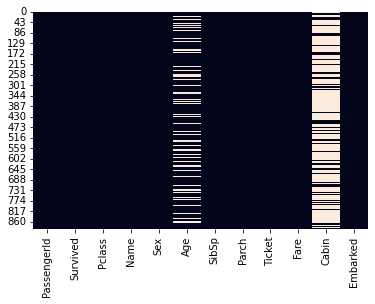

In [5]:
sns.heatmap(df_train.isnull(), cbar=False)

In [6]:
#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
df_prop = df_train.groupby(['Survived', 'Pclass', 'Sex']).count()
df_prop

#can see here that way more women survived than men, and proportionally it was the upper two clases (many more 3rd class women died)- HOWEVER as many women survived in 3rd and 2nd class (there was a lot more 3rd class onboard)
#can also see that ~450 men died, twice as many 3rd class, and many more second class men died than survived (interesting?)

#given the many missing age values-> could be important to base it on gender and class ?? (after train, test, split ?)

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass Sex                                                          
0        1      female            3     3    3      3      3       3     3   
                male             77    77   61     77     77      77    77   
         2      female            6     6    6      6      6       6     6   
                male             91    91   84     91     91      91    91   
         3      female           72    72   55     72     72      72    72   
                male            300   300  215    300    300     300   300   
1        1      female           91    91   82     91     91      91    91   
                male             45    45   40     45     45      45    45   
         2      female           70    70   68     70     70      70    70   
                male             17    17   15     17     17      17    17   
         3      female           72    72   47     72     72      72    72   
                male             47    47   38     47     47      47    47   

                        Cabin  Embarked  
Survived Pclass Sex                      
0        1      female      3         3  
                male       56        77  
         2      female      1         6  
                male        2        91  
         3      female      2        72  
                male        4       300  
1        1      female     78        89  
                male       39        45  
         2      female      9        70  
                male        4        17  
         3      female      4        72  
                male        2        47

In [7]:
#another way to do it
df_class1female =  df_train.loc[(df_train['Survived']==1)& (df_train['Pclass']==1 & (df_train['Sex']=='female'))].shape[0]
df_class1female #can also see above 

91

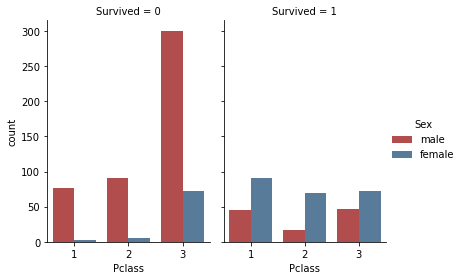

In [8]:
#plot it
sns.catplot(x="Pclass", col="Survived",
                data=df_train, kind="count",
                height=4, aspect=.7, palette='Set1', hue='Sex', saturation=.5)

#above info in bar graph

<AxesSubplot:xlabel='Age', ylabel='Count'>

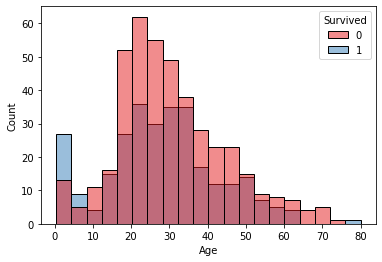

In [9]:
sns.histplot(x='Age', data=df_train, hue='Survived', palette ='Set1')
#most children and very old survived (only places of majority)- need to separate out into cage groups then

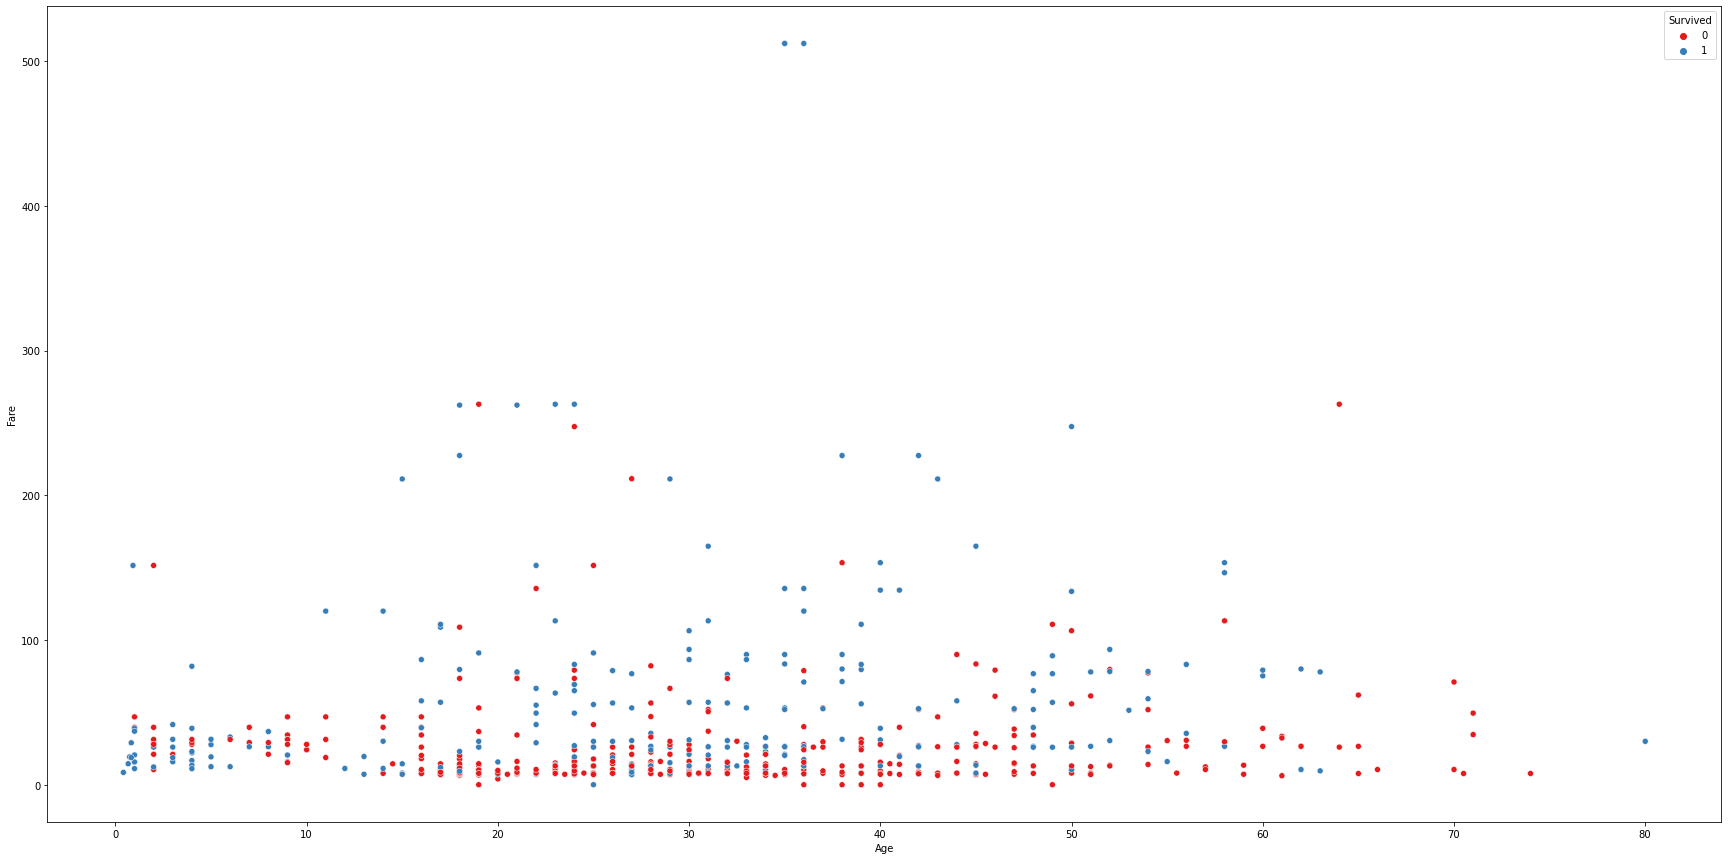

In [10]:
sns.scatterplot(x='Age', y='Fare', data=df_train, hue='Survived', palette='Set1')
import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(30, 15)

#notes: 2 fare outliers (scale), most who survived paid higher fares (logical)

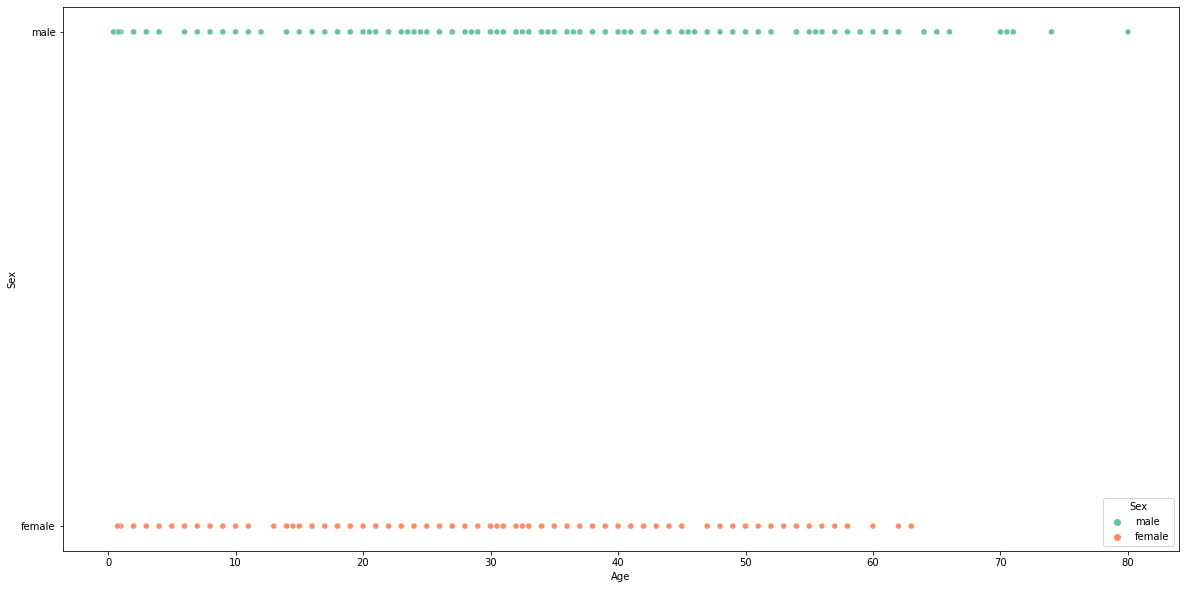

In [11]:
sns.scatterplot(x='Age', y='Sex', data=df_train, hue='Sex', palette='Set2')
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(20, 10)
#age dist per gender -> pretty similar amounts of children and young adults per gender, men over represented in elderly
#therefore ok to fill age with median per gender instead of age cohort also (hopefully)

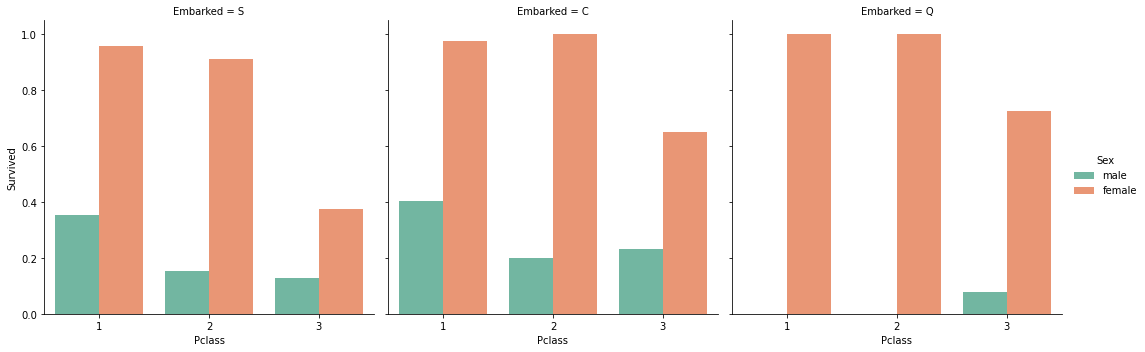

In [12]:
#is embarked important? perhaps- based on gender? higher survival rate of men (at all classes) first two points-> meaning last point where most third class boarded?
#choose type of figure 'Bar', with hue (Sex male or femal) and  col (embarked)
sns.catplot(x='Pclass', y= 'Survived', hue='Sex', col= 'Embarked', kind='bar', data= df_train, ci=None, palette = 'Set2')

<AxesSubplot:>

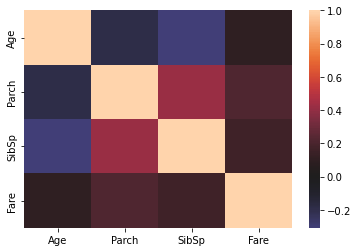

In [13]:
sns.heatmap(df_train[['Age', 'Parch','SibSp', 'Fare']].corr(), center=0)
#only strong corr between sibsp and parch (meaning families onboard)-> did whole families survive?

<AxesSubplot:xlabel='Fare', ylabel='Count'>

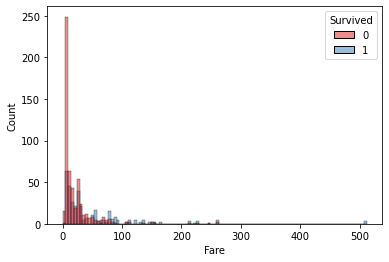

In [14]:
#fare??
sns.histplot(x='Fare', data=df_train, hue='Survived', palette ='Set1') #fare very skewed towards men with low fare

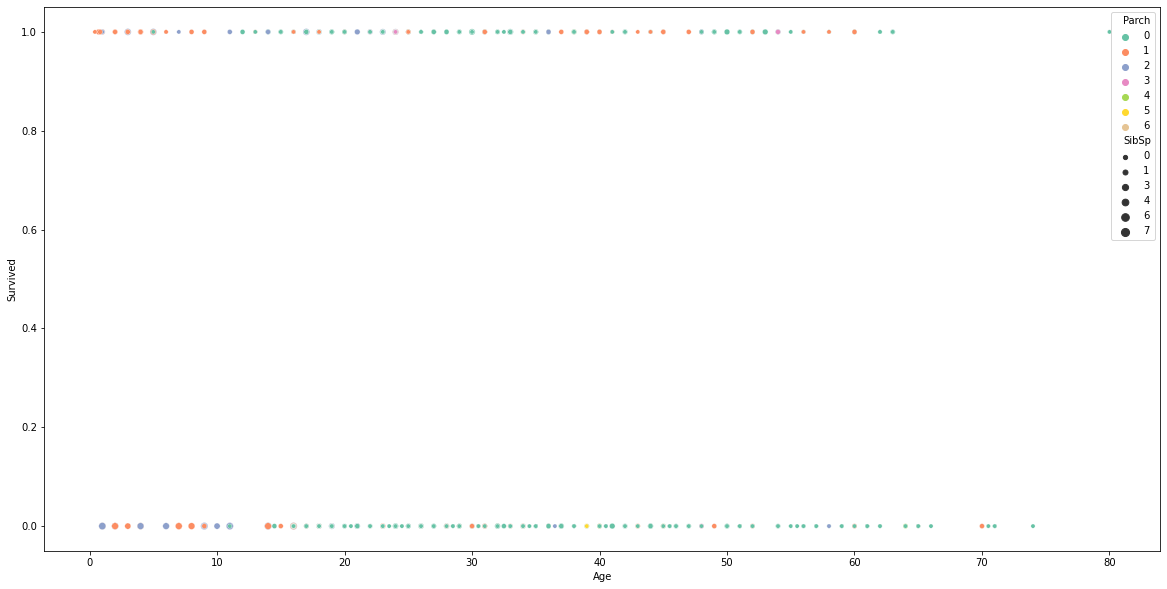

In [15]:
sns.scatterplot(x='Age', y='Survived', data=df_train, hue='Parch', size='SibSp', palette='Set2')

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10)

#having three or more sibsp-> more likely to die, most of 1 and 3 parch survived, and equal amounts of 2 died and survived approx
#will use parch and sibsp as combined var 

In [16]:
dftrain = df_train

In [17]:
#combine relevant cols
dftrain['ParSib'] = dftrain['SibSp'] + dftrain['Parch']
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParSib
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [18]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParSib
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [19]:
#keep all except cabin, passenger id and name -> future find out how best to look at corr w cabin etc.
dftrain = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [20]:
dftrain

,Survived,Pclass,Sex,Age,Fare,Embarked,ParSib
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [21]:
#assign X and y
X= dftrain.iloc[:,1:]#features
y= dftrain['Survived']  #label
X.shape, y.shape

((891, 6), (891,))

In [22]:
#test, train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)
X_train.shape, X_test.shape
X_train

,Pclass,Sex,Age,Fare,Embarked,ParSib
578,3,female,NaN,14.4583,C,1
323,2,female,22.0,29.0000,S,2
654,3,female,18.0,6.7500,Q,0
157,3,male,30.0,8.0500,S,0
692,3,male,NaN,56.4958,S,0
...,...,...,...,...,...,...
369,1,female,24.0,69.3000,C,0
320,3,male,22.0,7.2500,S,0
527,1,male,NaN,221.7792,S,0
125,3,male,12.0,11.2417,C,1


In [23]:
Xtrain= X_train
Xtest=X_test

In [24]:
datasets = [Xtrain, Xtest]
#for custom imputation and custom ordinal adjustment of features below

In [25]:
for datas in datasets:
    datas.loc[ datas['Fare'] <= 7.91, 'Fare'] = 0
    datas.loc[(datas['Fare'] > 7.91) & (datas['Fare'] <= 14.454), 'Fare'] = 1
    datas.loc[(datas['Fare'] > 14.454) & (datas['Fare'] <= 31), 'Fare']   = 2
    datas.loc[ datas['Fare'] > 31, 'Fare'] = 3
    datas['Fare'] = datas['Fare'].astype(int) 

In [26]:
import pdpipe as pdp
#tvisualise one hot encoded vars

In [27]:
#pdp OHE to look at it
pipeline=pdp.OneHotEncode(['Sex', 'Pclass', 'Embarked', 'ParSib'])

In [28]:
Xtrain = pipeline(X_train)
Xtest = pipeline(X_test)
Xtest
#tried like this to be sure that vars are manip (even tho pipeline obvi does it)

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,ParSib_1,ParSib_2,ParSib_3,ParSib_4,ParSib_5,ParSib_6,ParSib_7,ParSib_10
590,35.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
131,20.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
628,26.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
195,58.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
230,35.0,3,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,20.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0
203,45.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0
84,17.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
886,27.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [29]:
#transform columns to impute missing values -> median for age bc skewed 
t = [('num', SimpleImputer(strategy='mean'), [0]), ('cat', SimpleImputer(strategy='most_frequent'), [5, 6])]
transformer = ColumnTransformer(transformers=t)

#need to redistribute age and fare (try one then the other-> maybe remove original fare code)

#combine class and sibpar?? 

In [31]:
# define model
model = LogisticRegression()

In [32]:
# define pipeline
pipeline = Pipeline(steps=[('t', transformer), ('m',model)])
# fit the pipeline on the transformed data
pipeline.fit(Xtrain, y_train)
# make predictions
yhat = pipeline.predict(Xtest)

In [33]:
model.coef_

array([[-0.00545346, -0.38751673, -0.83939875]])

In [34]:
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [57]:
#sns.heatmap(Xtrain.isnull(), cbar=False) #this is the original df, not the array of arrays 
#why does it still show them as neg?? log reg wouldnt work if there was NaN  

#Each transformer will be concatenated to form a single feature space: Feature Space. Feature space refers to the n-dimensions where your variables live (not including a target variable, if it is present).

In [36]:
pipeline.score(Xtest, y_test) #n.b. in original model with just fare and age, only age imputed, predicted more accurately.. 

0.6771300448430493

In [37]:
#ROC etc. 

In [40]:
#model 2: also preprocessing without pipeline (pdp for OHE, fillna for imputing (diff to last, use df_train), manual for loop for fare to make OHE using IQR distribution (see all the way above))
Xtrain1 = X_train
Xtest1= X_test
import numpy as np

In [48]:
#fillna and convert to non float values (? necessary step ?)
Xtrain1['Age'].fillna(df_train['Age'].median(), inplace=True) #.apply(np.int64)

Xtest1['Age'].fillna(df_train['Age'].median(), inplace=True) #.apply(np.int64)

#n.b. this is different to pipeline above (I think?), filling with median original entire set (is this better, or will it make leakage?)

In [ ]:
#normalise  Age (by dividing by its mean)- bc so wildly distributed ?? 

In [50]:
#sns.heatmap(Xtest1.isnull(), cbar=False)

In [51]:
Xtrain1 #note since above made new col ParSib first, will be there for all models, fare also converted

,Pclass,Sex,Age,Fare,Embarked,ParSib
578,3,female,28.0,2,C,1
323,2,female,22.0,2,S,2
654,3,female,18.0,0,Q,0
157,3,male,30.0,1,S,0
692,3,male,28.0,3,S,0
...,...,...,...,...,...,...
369,1,female,24.0,3,C,0
320,3,male,22.0,0,S,0
527,1,male,28.0,3,S,0
125,3,male,12.0,1,C,1


In [53]:
Xtrain1_1 = pipeline(X_train)
Xtest1_1 = pipeline(X_test)
Xtest1_1

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,ParSib_1,ParSib_2,ParSib_3,ParSib_4,ParSib_5,ParSib_6,ParSib_7,ParSib_10
590,35.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
131,20.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
628,26.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
195,58.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
230,35.0,3,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,20.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0
203,45.5,0,1,0,1,0,0,0,0,0,0,0,0,0,0
84,17.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
886,27.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [55]:
model.fit(Xtrain1_1, y_train)

C:\Users\alexp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
model.score(Xtrain1_1, y_train) #much higher accuracy, median from total set reason, maybe leakage occurred, also higher than another model in which 

0.8083832335329342

In [ ]:
#ROC analysis

In [ ]:
#random forest to find out which feature contributing most to outcome (with non adjusted age)

In [58]:
#model 3: Feature engineering one step at a time
#kbins for age (ordinal, ), fare as ordinal ??, ParSib a good predictor?? (check on dftrain...)

#random forest to find out which feature contributing most to outcome (with non adjusted age)

#model 4: Feature engineering with a pipeline, adjusted for model three 
#https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/ (this is the clearer code for me for col trans)
#model 5: random forest 